In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt


In [2]:
X_train = joblib.load("../data/processed/X_train.pkl")
X_test = joblib.load("../data/processed/X_test.pkl")
y_train = joblib.load("../data/processed/y_train.pkl")
y_test = joblib.load("../data/processed/y_test.pkl")

preprocessor = joblib.load("../models/preprocessor.pkl")

print("Data loaded successfully!")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Data loaded successfully!
Train shape: (8000, 17)
Test shape: (2000, 17)


In [3]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9985

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



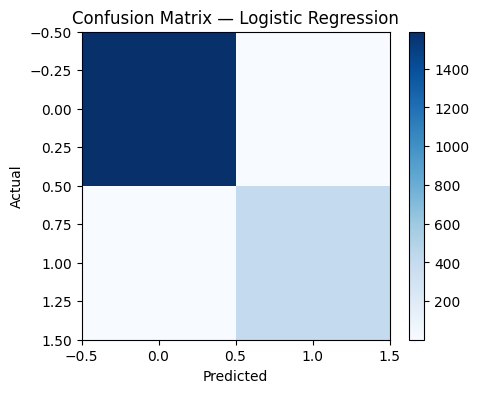

In [4]:
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()


In [5]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (RF):\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9985

Classification Report (RF):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



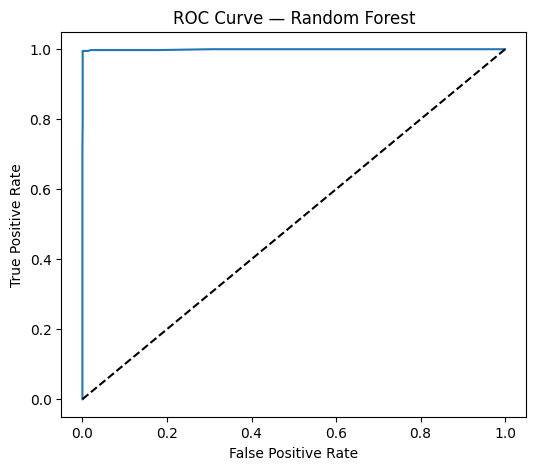

AUC Score: 0.9992171334614248


In [6]:
y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Random Forest")
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_prob))


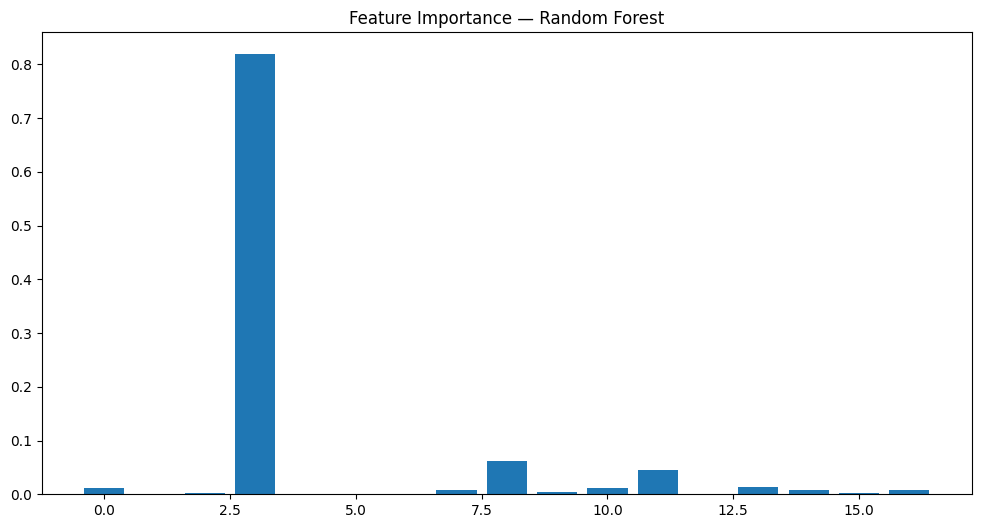

In [7]:
importances = rf.feature_importances_

plt.figure(figsize=(12,6))
plt.bar(range(len(importances)), importances)
plt.title("Feature Importance — Random Forest")
plt.show()


In [8]:
joblib.dump(rf, "../models/churn_model.pkl")
print("Model saved successfully!")


Model saved successfully!
